In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# [SAAS Spring 2022] Insights & Analytics Assignment #1
## Exploratory Data Analysis, Data Preprocessing, and Feature Engineering

In [2]:
# Load in the data
df = pd.read_csv('MetObjects.csv')

/Users/joez/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# View the first 3 rows of the data
df.head(3)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [4]:
df.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL'],
      dtype='object')

# Exploratory Data Analysis

### 1. Which  "Artist Display Names" produced the most pieces of artwork in The Met? Who were these "artists"? What was their artwork?

In [5]:
# computes the top 3 artists and stores them in an array
def top_3_names(df):
    top_3 = (
        np.array(
            df.groupby('Artist Display Name')
            .size()
            .reset_index()
            .sort_values(0, ascending=False)
            ['Artist Display Name'])
        [0:3]
    )
    return top_3
top_3_names(df)

array(['Walker Evans', 'Kinney Brothers Tobacco Company', 'Unknown'],
      dtype=object)

In [6]:
# computes the artwork of the projects for the top 3 artists
def top_3_artwork(df):
    artworks = df[
        (df['Artist Display Name'] == top_3_names(df)[0]) | 
        (df['Artist Display Name'] == top_3_names(df)[1]) |
        (df['Artist Display Name'] == top_3_names(df)[2])        
    ]
    return artworks['Title']
top_3_artwork(df)

9329                          Portrait of a Mariano Abasolo
9330                   Portrait of General Juan Pablo Anaya
67244                                                  Coat
118172           Alexander Danilovich Menshikov (1673–1729)
156153    [Album of 28 Views of the Massachusetts Shorel...
                                ...                        
473811    [Walker Evans Playing Golf, Old Lyme Country C...
473817    [Isabelle and Walker Evans at their House, Old...
474393             [John McDonald, Cranberry Island, Maine]
474405    [Isabelle Evans and Grenville Emmet at a New Y...
474409     [Trunk and Walker Evans's Collection of Erotica]
Name: Title, Length: 15155, dtype: object

### 2. Observe the 'River' Column -- how many of the values are NaN? What do you think this column means?
- hint: try taking a look at the relationship between the River value and other column values for each row

In [7]:
# computes the proportion of fields in the river column that are NaN
river_nan_prop = df['River'].isna().mean()
river_nan_prop

0.9955924925316068

In [8]:
# I believe this columns represents whether an
# artwork contains river imagery or symbolism

### 3. Observe the 'Artist Gender' column -- there should be a lot of "|" characters. What do these mean?

In [9]:
df[df['Artist Gender'] == 'Female'][['Artist Gender', 'Artist Display Name', 'Artist Display Bio']]

,Artist Gender,Artist Display Name,Artist Display Bio
870,Female,Marie Zimmermann,"American, Brooklyn, New York 1879–1972 Punta G..."
1137,Female,Evelyn Beatrice Longman,"American, Winchester, Ohio 1874–1954 Ostervill..."
2002,Female,Florence Koehler,1861–1944
2234,Female,Louise McLaughlin,"American, Cincinnati, Ohio 1847–1939 Cincinnat..."
4792,Female,Louise McLaughlin,"American, Cincinnati, Ohio 1847–1939 Cincinnat..."
...,...,...,...
475684,Female,Gabrielle de Veaux Clements,"American, Philadelphia, Pennsylvania 1858–1948..."
475714,Female,Gabrielle de Veaux Clements,"American, Philadelphia, Pennsylvania 1858–1948..."
475810,Female,Lady Sarah Caroline Sitwell,"British, 1779–1860"
475896,Female,Lisa Rhana,"American, Seattle, Washington 1902–1985 New York"


In [10]:
df[df['Artist Gender'] == '|'][['Artist Gender', 'Artist Display Name', 'Artist Display Bio']]

,Artist Gender,Artist Display Name,Artist Display Bio
34,|,Paulding Farnham|Tiffany & Co.,1859–1927|1837–present
111,|,Louis Comfort Tiffany|Tiffany Glass and Decora...,"American, New York 1848–1933 New York|American..."
112,|,Louis Comfort Tiffany|Tiffany Glass and Decora...,"American, New York 1848–1933 New York|American..."
203,|,Louis Comfort Tiffany|Tiffany Glass and Decora...,"American, New York 1848–1933 New York|American..."
204,|,Louis Comfort Tiffany|Tiffany Glass and Decora...,"American, New York 1848–1933 New York|American..."
...,...,...,...
475928,|,"Dr. J. C. Ayer & Co., Lowell, Massachusetts|Ju...","American, active 1869–90|American, active 1866..."
475929,|,"Dr. J. C. Ayer & Co., Lowell, Massachusetts|Ju...","American, active 1869–90|American, active 1866..."
475931,|,"G. G. Green, Woodbury, New Jersey|Frank Hart, ...","American, established 1868|American, active 19..."
475932,|,"Robert Kendrick|Ogden Codman, Jr.","American, active 1900–1904|American, Boston, M..."


Based on our observation, it looks like 
'|' stands for groups of collaborators on artworks
Our suspicion is strengthened by the fact that when
looking at individual genders, only one name is 
associated with that

Or it stands for 'or' which would be somewhat suspicious though

# Data Preprocessing and Feature Engineering

### 1a. What's the Best Way to Deal with NaN Values in the Classification column? Why?

### 1b. Perform that data imputation (replace the NaN values with something)

In [11]:
# replaces NaN values with 'Other' in the 'Classification' column
df['Classification'] = df['Classification'].fillna('Other')

# looks at unique categories within 'Classification'
df['Classification'].unique()

array(['Other', 'Metalwork-Brass', 'Metalwork-Pewter', ...,
       'Books|Periodicals|Prints', 'Tools|Prints',
       'Miscellaneous|Ephemera'], dtype=object)

### 2. Create a new feature (column) that contains the length of the Title of the artwork and add it to the dataframe

In [12]:
# adds a new column with the length of each title
df['Title Length'] = df['Title'].str.len()
df['Title Length']

0         28.0
1         28.0
2         26.0
3         26.0
4         26.0
          ... 
476001    19.0
476002    37.0
476003    23.0
476004    40.0
476005    31.0
Name: Title Length, Length: 476006, dtype: float64

### 3. One-hot Encode the Department feature and add these one-hot encoded features to the dataframe

In [13]:
# one hot encoded department dataframe
ohe_department_small = pd.get_dummies(data=df['Department'])

# merge with df
ohe_department_big = df.merge(right=ohe_department_small, left_index=True, right_index=True)
ohe_department_big

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,Greek and Roman Art,Islamic Art,Medieval Art,Modern and Contemporary Art,Musical Instruments,Photographs,Robert Lehman Collection,The American Wing,The Cloisters,The Libraries
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,0,0,0,0,0,0,0,1,0,0
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,0,0,0,0,0,0,0,1,0,0
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,0,0,0,0,0,0,0,1,0,0
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,0,0,0,0,0,0,0,1,0,0
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476001,30.90.3,False,False,False,854855,NaN,Drawings and Prints,NaN,Print,Ex Libris: Leippert,...,0,0,0,0,0,0,0,0,0,0
476002,30.90.4,False,False,False,854856,NaN,Drawings and Prints,NaN,Print,Small bookplate for James G. Leippert,...,0,0,0,0,0,0,0,0,0,0
476003,38.61.1,False,False,False,854857,NaN,Drawings and Prints,NaN,Print,Ruth's Book (bookplate),...,0,0,0,0,0,0,0,0,0,0
476004,38.61.2,False,False,False,854858,NaN,Drawings and Prints,NaN,Print,Ex Libris: Madeline De Bouthe Schuermann,...,0,0,0,0,0,0,0,0,0,0


### 4. The 'Artist Nationality' column is a mess -- create a new column in the dataframe with a list/set of each of the nationalities that appear in the 'Artist Nationality' column without any spaces or special characters

In [14]:
# inspection of the 'Artist Nationality' column
df['Artist Nationality'].value_counts()

                                                                                                                                                                                           66757
American                                                                                                                                                                                   46578
 |                                                                                                                                                                                         16904
French                                                                                                                                                                                     16327
Italian                                                                                                                                                                                    11699
                                   

In [15]:
# replaces anything that is not a letter
df['Organized Nationality'] = df['Artist Nationality'].str.replace(r'[^a-zA-Z|]', '', regex=True).fillna('')

# split the nationalities along the '|' character and set that to a new column
df['Organized Nationality'] = df['Organized Nationality'].str.split('|')

df[['Organized Nationality', 'Artist Nationality']]

,Organized Nationality,Artist Nationality
0,[American],American
1,[],
2,[],NaN
3,[],NaN
4,[],NaN
...,...,...
476001,[],
476002,[],
476003,[],
476004,[],


### 5. Observe the 'Dimensions' column. Let's say we wanted to create numerical features from this column to classify certain objects. What features would you create? Briefly describe how you would create them.

In [16]:
df[['Dimensions']]

,Dimensions
0,Dimensions unavailable
1,Dimensions unavailable
2,Diam. 11/16 in. (1.7 cm)
3,Diam. 11/16 in. (1.7 cm)
4,Diam. 11/16 in. (1.7 cm)
...,...
476001,Sheet: 3 3/4 × 2 11/16 in. (9.5 × 6.8 cm)
476002,Sheet: 1 7/16 × 1 1/8 in. (3.7 × 2.8 cm)\r\nSh...
476003,Image: 2 3/16 × 1 3/4 in. (5.6 × 4.5 cm)\r\nSh...
476004,Image: 3 3/8 × 2 3/8 in. (8.5 × 6 cm)\r\nSheet...


From what we can see, the dimensions from art pieces are either not given, only one parameter such as height is given, two parameters is given, which would fit the piece into a rectangle, or 3 parameters are given, fitting the piece into a rectangular prism. The maximum amount of features given would be height, width, and length (or diameter)

We would probably write a regular expression that matches any of the formats that appear in the 'Dimensions' column,  capture them, and store them in a new column with more descriptive names such as 'width' or 'length'.

### 6. Create a 'AccessionYearClean' column from 'AccessionYear' that it only contains integers representing the accession year. Create a visualization for the distribution of values in 'AccessionYearClean'.

In [17]:
#fills nan values with 9999
df['AccessionYearClean'] = df['AccessionYear'].astype(str).str[0:4].replace('nan', '9999').astype(int)
df['AccessionYearClean']

0         1979
1         1980
2         1967
3         1967
4         1967
          ... 
476001    9999
476002    9999
476003    9999
476004    9999
476005    1951
Name: AccessionYearClean, Length: 476006, dtype: int64

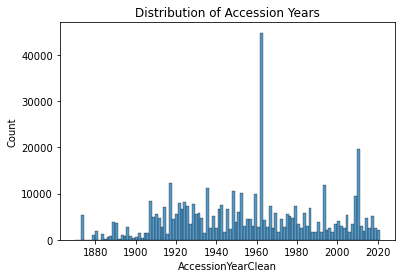

In [18]:
(
    sns.histplot(df.query('AccessionYearClean < 9999')['AccessionYearClean'])
    .set(
        title='Distribution of Accession Years'    
    )
);

### 7. Create a new feature/column called "Number of Artists" that represents the number of artists listed for each piece of art

In [19]:
# here we split by '|' to get individual names and we replace the nan values with a value that we could easily notice
df['Number of Artists'] = df['Artist Display Name'].fillna('|'*999).str.split('|').map(len)

# here we replace 1000 with 0
df['Number of Artists'] = df['Number of Artists'].astype(str).replace('1000', '0').astype(int)

df.sort_values(by='Number of Artists')

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Title Length,Organized Nationality,AccessionYearClean,Number of Artists
238002,2006.50.93,False,False,False,370381,NaN,Drawings and Prints,2006.0,Print,Condé Family Portrait,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,21.0,[],2006,0
197864,36.30.205,False,False,True,323426,NaN,Ancient Near Eastern Art,1936.0,Sealing,Sealing,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,[],1936,0
197865,36.30.206,False,False,True,323427,NaN,Ancient Near Eastern Art,1936.0,Sealing,Sealing,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,[],1936,0
197866,36.30.207,False,False,True,323428,NaN,Ancient Near Eastern Art,1936.0,Sealing,Sealing,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,[],1936,0
197867,36.30.208,False,False,True,323429,NaN,Ancient Near Eastern Art,1936.0,Sealing,Sealing,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,[],1936,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472330,60.502.7(1),False,False,False,838148,NaN,Drawings and Prints,1960.0,Book,Illustrated London Almanack,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,27.0,"[, , , , , , , , , , , , , , , , , , , , , , ,...",1960,87
475880,66.540.34,False,False,False,853788,NaN,Drawings and Prints,1966.0,Book,"A London Garland, Selected from Five Centuries...",...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,120.0,"[, , , , , , , , , , , , , , , , , , , , , , ,...",1966,92
250069,2008.195.3,False,False,False,382900,NaN,Drawings and Prints,2008.0,Portfolio,"The Century Gallery of 100 Portraits, Selected...",...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,72.0,"[British, American, British, American, America...",2008,108
220378,60.502.7(1–4),False,False,False,351966,NaN,Drawings and Prints,1960.0,Book,Illustrated London Almanack,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,27.0,"[, , , , , , , , , , , , British, British, Bri...",1960,135
